# Import Libraries & Datasets

In [50]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nobel = pd.read_csv("nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [51]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

# What is the most commonly awarded gender?

In [52]:
# check null values in the sex and birth_country column
print("Before:")
print(nobel['sex'].isna().sum())
print(nobel['birth_country'].isna().sum())

# drop all rows when the sex & birth_country column is NaN
nobel.dropna(subset=["sex", "birth_country"], inplace=True)

# check null values in the sex and birth_country column again
print("After:")
print(nobel['sex'].isna().sum())
print(nobel['birth_country'].isna().sum())

Before:
30
31
After:
0
0


First, we need to count the occurrences of each gender. Here, we use the `value_counts` function on the `sex` and `birth_country` columns to count how many times "Male" and "Female" appear and how often each country appears.

In [53]:
# Check the number of gender and birth country and display it
num_gender = nobel['sex'].value_counts()
num_country = nobel['birth_country'].value_counts()

display(num_gender)
display(num_country)

sex
Male      904
Female     65
Name: count, dtype: int64

birth_country
United States of America                                291
United Kingdom                                           91
Germany                                                  67
France                                                   58
Sweden                                                   30
                                                       ... 
Belgian Congo (now Democratic Republic of the Congo)      1
Ethiopia                                                  1
Lebanon                                                   1
Philippines                                               1
French protectorate of Tunisia (now Tunisia)              1
Name: count, Length: 129, dtype: int64

After that, we can filter only the top gender and birth country by selecting their first index.

In [54]:
# Find the most common gender and birth country
top_gender = num_gender.index[0]
top_country = num_country.index[0]

print(top_gender)
print(top_country)

Male
United States of America


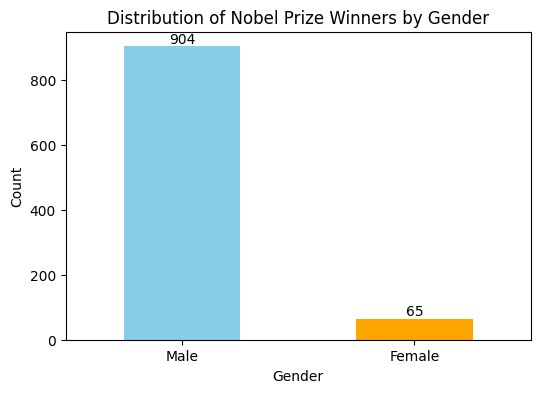

In [55]:
# Plot the gender distribution
plt.figure(figsize=(6, 4))
bars = num_gender.plot(kind='bar', color=['skyblue', 'orange'])

# Add bar labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
             bar.get_height(),                 # Y position (height of bar)
             int(bar.get_height()),            # Text (the count)
             ha='center', va='bottom', fontsize=10)  # Alignment and font size

# Add titles and labels
plt.title('Distribution of Nobel Prize Winners by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

From this result, we can see that the most commonly awarded gender is `Male` with `904` of prize winners.

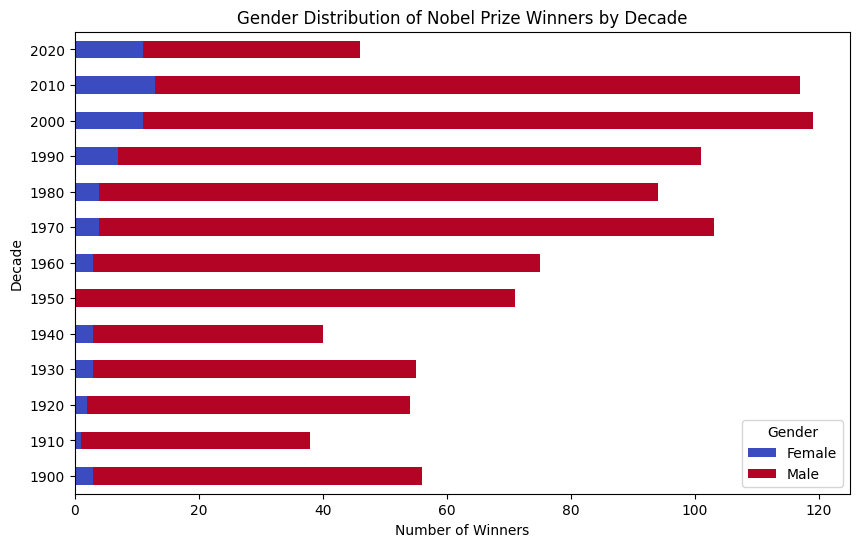

In [56]:
nobel['decade'] = (nobel['year'] // 10) * 10
gender_by_decade = nobel.groupby(['decade', 'sex']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
gender_by_decade.plot(kind='barh', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title('Gender Distribution of Nobel Prize Winners by Decade')
plt.ylabel('Decade')
plt.xlabel('Number of Winners')
plt.legend(title='Gender')
plt.show()

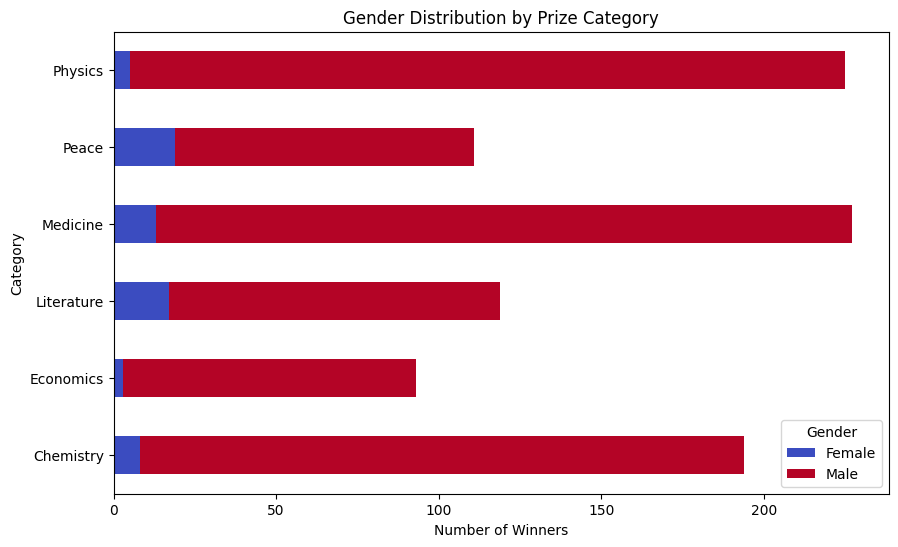

In [57]:
gender_by_category = nobel.groupby(['category', 'sex']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
gender_by_category.plot(kind='barh', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title('Gender Distribution by Prize Category')
plt.ylabel('Category')
plt.xlabel('Number of Winners')
plt.legend(title='Gender')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_23020\299661572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=org_gender_count.index, y=org_gender_count.values, palette=["orange", "lightblue"])


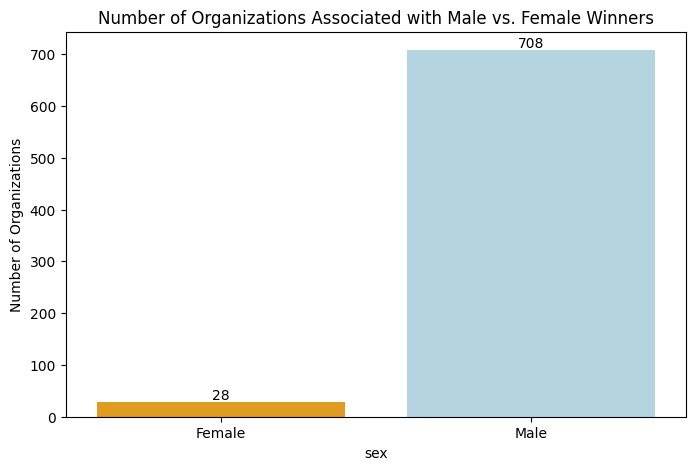

In [58]:
org_gender = nobel.groupby(['organization_name', 'sex']).size().unstack().fillna(0)
org_gender_count = org_gender.sum()

plt.figure(figsize=(8, 5))
bars = sns.barplot(x=org_gender_count.index, y=org_gender_count.values, palette=["orange", "lightblue"])

# Add bar labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(),                 
             int(bar.get_height()),          
             ha='center', va='bottom', fontsize=10)

plt.title('Number of Organizations Associated with Male vs. Female Winners')
plt.ylabel('Number of Organizations')
plt.show()

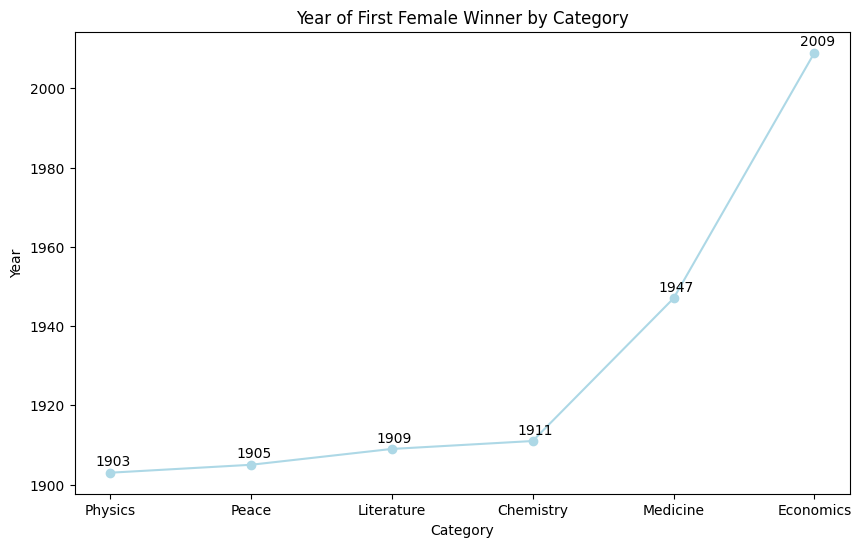

Year of First Female Winner by Category:
category
Physics       1903
Peace         1905
Literature    1909
Chemistry     1911
Medicine      1947
Economics     2009
Name: year, dtype: int64


In [59]:
# Time-to-first-female-winner by category
first_female_winner = nobel[nobel['sex'] == 'Female'].groupby('category')['year'].min().sort_values()

plt.figure(figsize=(10, 6))
plt.plot(first_female_winner.index, first_female_winner.values, marker='o', color='lightblue')

# Add labels above markers
for i, txt in enumerate(first_female_winner.values):
    plt.annotate(txt, (first_female_winner.index[i], first_female_winner.values[i]), textcoords='offset points', xytext=(2, 5), ha='center')

plt.title('Year of First Female Winner by Category')
plt.ylabel('Year')
plt.xlabel('Category')
plt.show()

print("Year of First Female Winner by Category:")
print(first_female_winner)

# What is the most commonly awarded birth country?

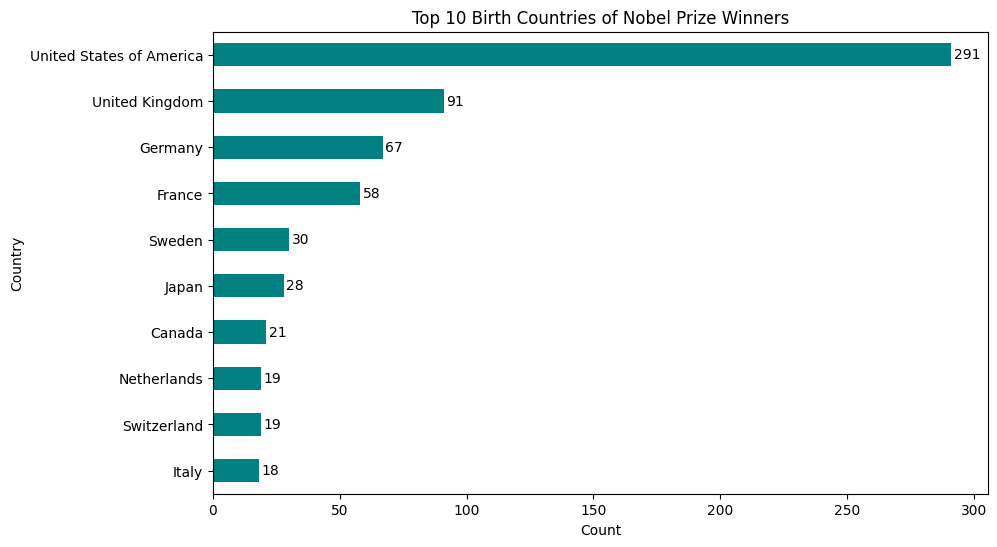

In [60]:
# Sort the Series in descending order and select the top 10
sorted_num_country = num_country.sort_values(ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sorted_num_country.plot(kind='barh', color='teal')

# Reverse the y-axis to show the highest number on top
plt.gca().invert_yaxis()

# Add bar labels
for bar in bars.patches:
    plt.text(bar.get_width() + 1,  # X position (right of bar)
             bar.get_y() + bar.get_height() / 2,  # Y position (center of bar)
             int(bar.get_width()),  # Text (the count)
             ha='left', va='center', fontsize=10)  # Alignment and font size

# Add titles and labels
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

From this result, we can see that the `United States of America` as the most commonly awarded birth country with `291` winners.

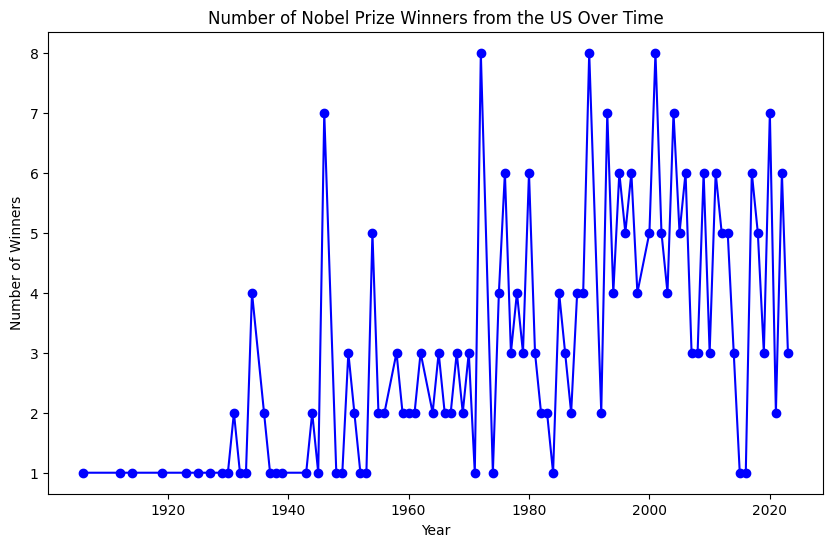

Number of Nobel Prize Winners from the US by Year:
year
1906    1
1912    1
1914    1
1919    1
1923    1
       ..
2019    3
2020    7
2021    2
2022    6
2023    3
Length: 92, dtype: int64


In [61]:
us_winners_by_year = nobel[nobel['birth_country'] == 'United States of America'].groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(us_winners_by_year.index, us_winners_by_year.values, marker='o', color='blue')
plt.title('Number of Nobel Prize Winners from the US Over Time')
plt.ylabel('Number of Winners')
plt.xlabel('Year')
# plt.grid(True)
plt.show()

print("Number of Nobel Prize Winners from the US by Year:")
print(us_winners_by_year)

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

To answer this question, we need to calculate the ratio of the US-born winners, and then find the decade with the highest US-born winner ratio. Let’s do it!!!

First, create a new column `us_born_winners` that flags if the laureate's birth_country is "United States of America."

In [62]:
# Create the US-born winners column
nobel['us_born_winners'] = nobel['birth_country'] == "United States of America"

nobel[['birth_country', 'us_born_winners']].tail()

,birth_country,us_born_winners
995,United States of America,True
996,USSR (now Russia),False
997,Norway,False
998,Iran,False
999,United States of America,True


After that, create a `decade` column to convert the year into decades by dividing by 10, flooring the result, and multiplying back by 10.

In [63]:
# Create the decade column
nobel['decade'] = np.floor(nobel['year'] / 10) * 10
nobel['decade'] = nobel['decade'].astype('int')

nobel[['year', 'decade']].head()

,year,decade
0,1901,1900
1,1901,1900
2,1901,1900
3,1901,1900
4,1901,1900


After we have the `us_born_winners` and `decade` columns, we need to group the data by `decade`. Here we use the `groupby` function to aggregate the total winners and U.S.-born winners for each decade.

In [64]:
# Group by decade and calculate the total and US-born laureates per decade
decade_data = nobel.groupby('decade').agg(
    total_winners=('year', 'count'),
    us_born_winners=('us_born_winners', 'sum')
).reset_index()

decade_data.head(10)

,decade,total_winners,us_born_winners
0,1900,56,1
1,1910,38,3
2,1920,54,4
3,1930,55,14
4,1940,40,13
5,1950,71,21
6,1960,75,21
7,1970,103,33
8,1980,94,31
9,1990,101,42


And then, create a new `us_born_ratio` column for the ratio of U.S.-born laureates to total laureates in each decade.

In [65]:
# Calculate the ratio of US-born winners
decade_data['us_born_ratio'] = decade_data['us_born_winners'] / decade_data['total_winners']

decade_data[['us_born_winners', 'total_winners', 'us_born_ratio']].head()

,us_born_winners,total_winners,us_born_ratio
0,1,56,0.017857
1,3,38,0.078947
2,4,54,0.074074
3,14,55,0.254545
4,13,40,0.325000


Finally, we can find the decade with the highest ratio by locating the row where `us_born_ratio` is at its maximum.

In [66]:
# Find the decade with the highest US-born winner ratio
max_decade_usa = decade_data[decade_data['us_born_ratio'] == decade_data['us_born_ratio'].max()]['decade'].values[0]

print(max_decade_usa)

2000


Additionally, we can also plot the result to find trends and patterns of the US-born ration for each decade.

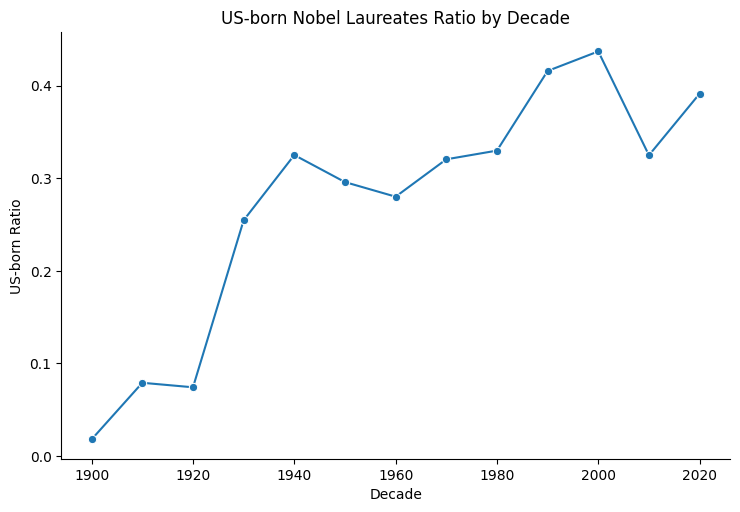

In [67]:
import matplotlib.pyplot as plt

# Create a relational line plot
sns.relplot(
    x='decade', 
    y='us_born_ratio', 
    kind='line', 
    data=decade_data, 
    marker='o', 
    aspect=1.5
)

# Add title and labels
plt.title('US-born Nobel Laureates Ratio by Decade')
plt.xlabel('Decade')
plt.ylabel('US-born Ratio')

# Show the plot
plt.show()

From this plot, we can see that the decade with highest ratio of US-born Nobel Prize winners is `2000`.

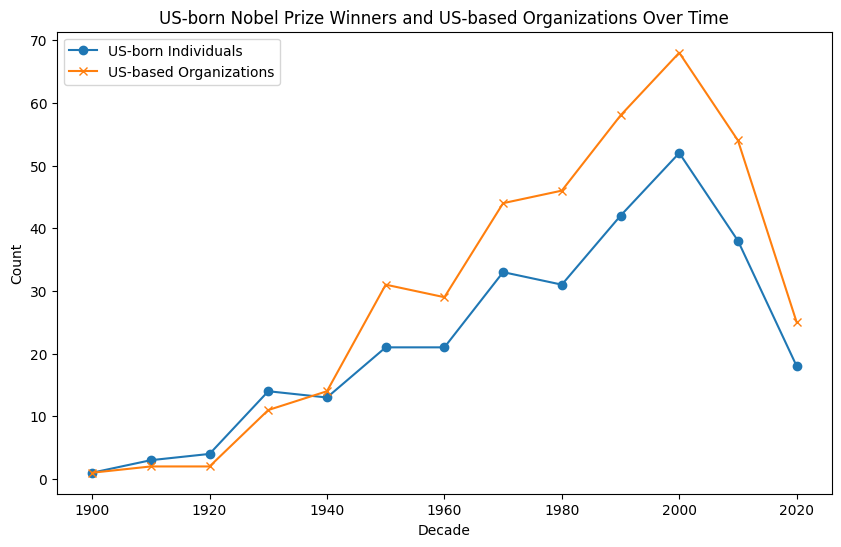

In [68]:
# Add decade column
nobel['decade'] = (nobel['year'] // 10) * 10

# Filter US-born individuals
us_individuals = nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').size()

# Filter US-based organizations
us_organizations = nobel[nobel['organization_country'] == 'United States of America'].groupby('decade').size()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(us_individuals.index, us_individuals.values, marker='o', label='US-born Individuals')
plt.plot(us_organizations.index, us_organizations.values, marker='x', label='US-based Organizations')
plt.title('US-born Nobel Prize Winners and US-based Organizations Over Time')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend()
# plt.grid(True)
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Let’s find out which Nobel Prize category and decade had the most female representation.

First, let’s flag the female laureates. We can do this by add a new column `is_female` that is True if the laureate's sex is "Female."

In [69]:
# Create a column indicating whether the laureate is female
nobel['is_female'] = nobel['sex'] == 'Female'

nobel[['sex', 'is_female']].tail()

,sex,is_female
995,Male,False
996,Male,False
997,Male,False
998,Female,True
999,Female,True


After that, we can group the data by `decade` and `category` to count the total laureates and female laureates for each combination of `decade` and `category`.

In [70]:
# Group by decade and category, calculate total laureates and female laureates
grouped_data = nobel.groupby(['decade', 'category']).agg(
    total_winners=('year', 'count'),
    female_winners=('is_female', 'sum')
).reset_index()

grouped_data.head()

,decade,category,total_winners,female_winners
0,1900,Chemistry,9,0
1,1900,Literature,10,1
2,1900,Medicine,11,0
3,1900,Peace,13,1
4,1900,Physics,13,1


After the data is grouped, we can calculate the female ratio by creating a new column `female_ratio` for the proportion of female winners in each group.

In [71]:
# Calculate the proportion of female laureates
grouped_data['female_ratio'] = grouped_data['female_winners'] / grouped_data['total_winners']

grouped_data[['decade', 'category', 'female_winners', 'total_winners', 'female_ratio']].head()

,decade,category,female_winners,total_winners,female_ratio
0,1900,Chemistry,0,9,0.000000
1,1900,Literature,1,10,0.100000
2,1900,Medicine,0,11,0.000000
3,1900,Peace,1,13,0.076923
4,1900,Physics,1,13,0.076923


Lastly, find the row with the maximum female ratio and extract the relevant decade and category.

In [72]:
# Find the row with the highest female ratio
max_row = grouped_data.loc[grouped_data['female_ratio'].idxmax()]

# Extract the decade and category and store in a dictionary
max_female_dict = {int(max_row['decade']): max_row['category']}

print(max_female_dict)

{2020: 'Literature'}


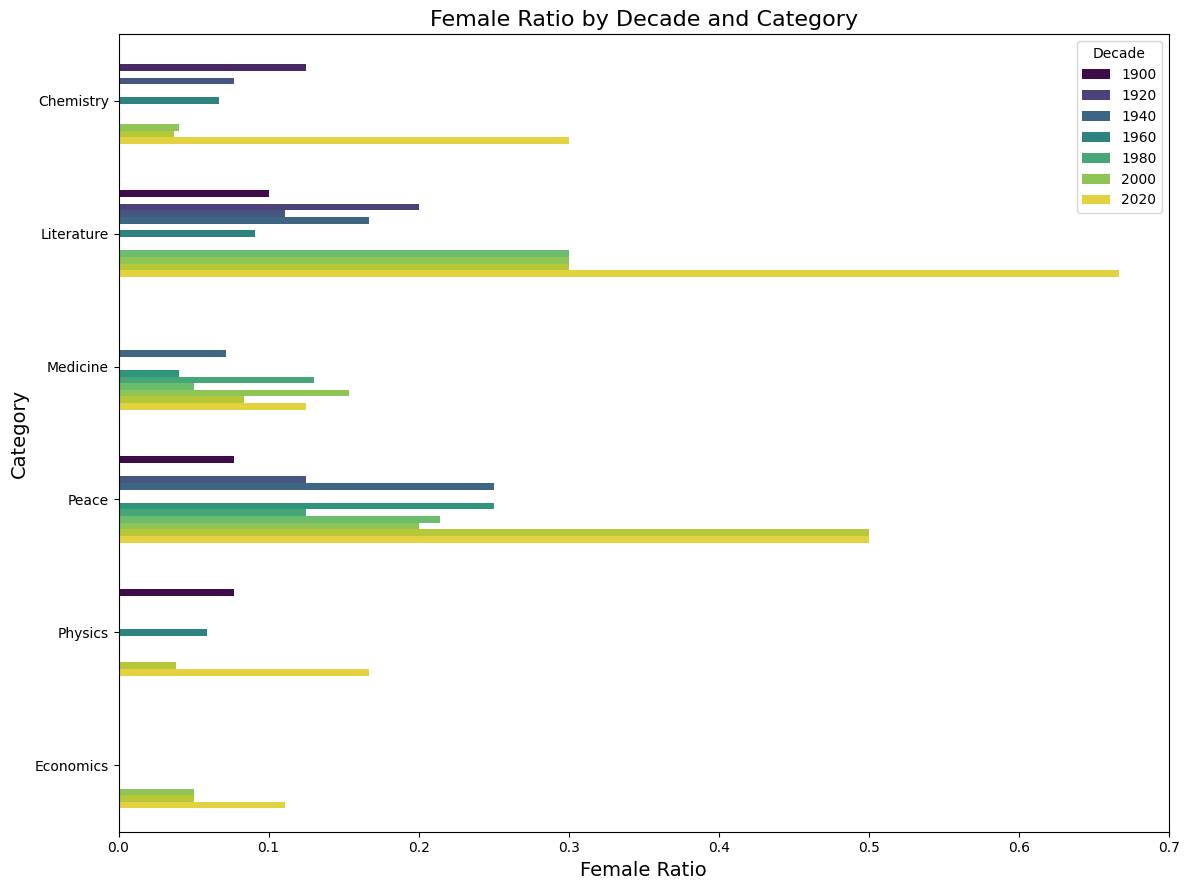

In [73]:
# Create a figure and axis
plt.figure(figsize=(12, 9))

# Plot the female ratio by decade and category
ax = sns.barplot(x='female_ratio', y='category', data=grouped_data, hue='decade', dodge=True, palette='viridis', width=0.65)

# Titles and labels
plt.title('Female Ratio by Decade and Category', fontsize=16)
plt.xlabel('Female Ratio', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Decade')

plt.tight_layout()
plt.show()


This tells us that in the `2020s`, the Nobel Prize category of `Literature` had the highest proportion of female laureates compared to all other category-decade combinations.

In [74]:
nobel['decade'] = (nobel['year'] // 10) * 10

female_counts = nobel[nobel['sex'] == 'Female'].groupby(['decade', 'category']).size()
total_counts = nobel.groupby(['decade', 'category']).size()
female_ratios = (female_counts / total_counts).fillna(0).reset_index(name='female_ratio')

pre_1990 = female_ratios[female_ratios['decade'] < 1990]
post_1990 = female_ratios[female_ratios['decade'] >= 1990]

avg_pre_1990 = pre_1990['female_ratio'].mean()
avg_post_1990 = post_1990['female_ratio'].mean()
print('Average Female Ratio before 1990:', avg_pre_1990)
print('Average Female Ratio after 1990:', avg_post_1990)

Average Female Ratio before 1990: 0.044621034366079115
Average Female Ratio after 1990: 0.17443367589200923


In [75]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(pre_1990['female_ratio'], post_1990['female_ratio'])
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: -4.382905109540276
p-value: 4.031763341473597e-05


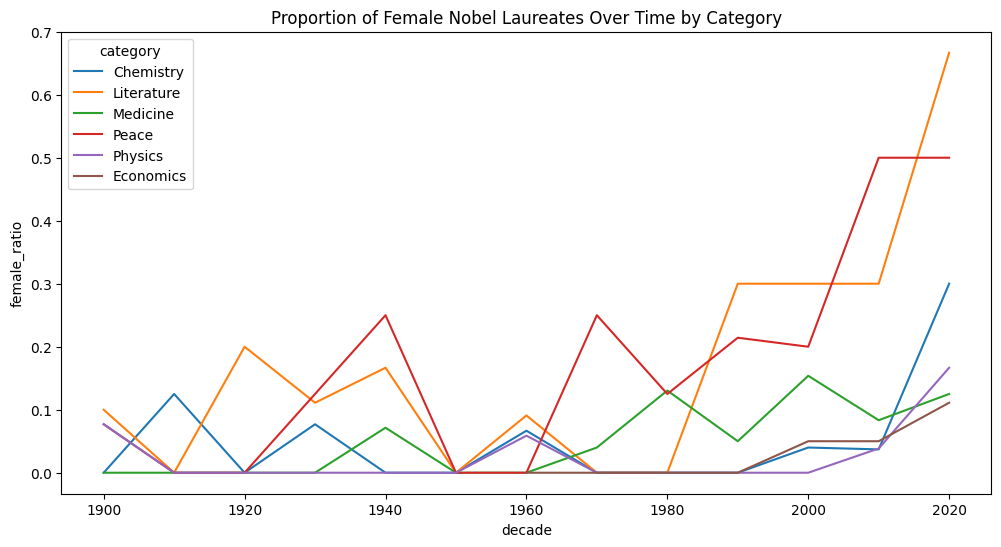

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_ratios, x='decade', y='female_ratio', hue='category')
plt.title('Proportion of Female Nobel Laureates Over Time by Category')
plt.show()

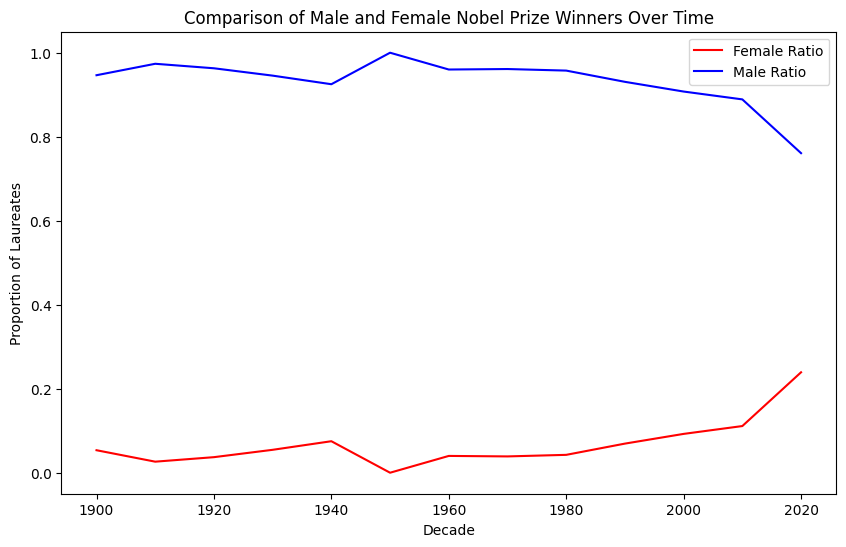

In [77]:
nobel['decade'] = (nobel['year'] // 10) * 10
sex_counts = nobel.groupby(['decade', 'sex']).size().unstack(fill_value=0)

sex_counts['total'] = sex_counts['Female'] + sex_counts['Male']
sex_counts['female_ratio'] = sex_counts['Female'] / sex_counts['total']
sex_counts['male_ratio'] = sex_counts['Male'] / sex_counts['total']


plt.figure(figsize=(10, 6))
plt.plot(sex_counts.index, sex_counts['female_ratio'], color='red', label='Female Ratio')
plt.plot(sex_counts.index, sex_counts['male_ratio'], color='blue', label='Male Ratio')

plt.title('Comparison of Male and Female Nobel Prize Winners Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Laureates')
plt.legend()
plt.show()

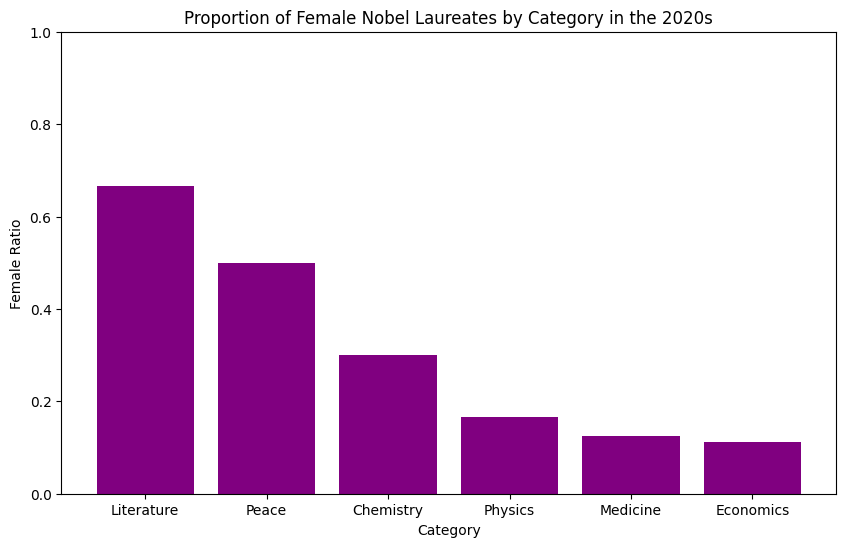

In [102]:
nobel['decade'] = (nobel['year'] // 10) * 10
df_2020s = nobel[nobel['decade'] == 2020]

sex_counts_2020s = df_2020s.groupby(['category', 'sex']).size().unstack(fill_value=0)
sex_counts_2020s['female_ratio'] = sex_counts_2020s['Female'] / (sex_counts_2020s['Female'] + sex_counts_2020s['Male'])
sex_counts_2020s.sort_values(by="female_ratio", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(sex_counts_2020s.index, sex_counts_2020s['female_ratio'], color='purple')

plt.title('Proportion of Female Nobel Laureates by Category in the 2020s')
plt.xlabel('Category')
plt.ylabel('Female Ratio')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

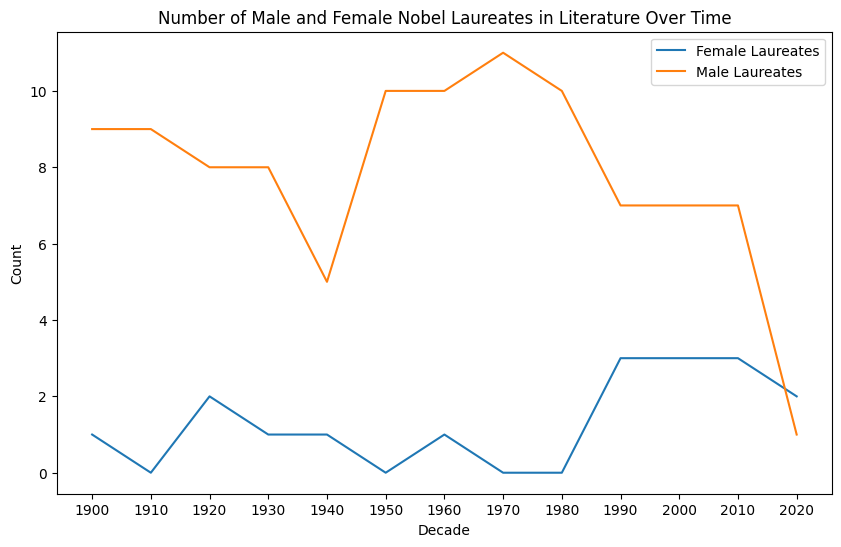

In [110]:
# Ensure year is integer and add decade column
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')
nobel['decade'] = (nobel['year'] // 10) * 10

# Filter only the Literature category
literature_df = nobel[nobel['category'] == 'Literature']

# Count male and female laureates per decade
literature_sex_counts = literature_df.groupby(['decade', 'sex']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(literature_sex_counts.index, literature_sex_counts['Female'], label='Female Laureates')
plt.plot(literature_sex_counts.index, literature_sex_counts['Male'], label='Male Laureates')

plt.title('Number of Male and Female Nobel Laureates in Literature Over Time')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend()
plt.xticks(literature_sex_counts.index, rotation=0)
plt.show()


# Who was the first woman to receive a Nobel Prize, and in what category?

First, let’s create a subset of the dataset containing only female winners to filter the female laureates: `female_laureates`.

In [79]:
# Filter for female laureates
female_laureates = nobel[nobel['sex'] == 'Female']

female_laureates[['sex', 'is_female']]

,sex,is_female
19,Female,True
29,Female,True
51,Female,True
62,Female,True
128,Female,True
...,...,...
982,Female,True
989,Female,True
993,Female,True
998,Female,True


After that, we can arrange the female laureates by the year they won the Nobel Prize: `first_female_laureate`.

In [80]:
# Sort by year to find the earliest laureate
first_female_laureate = female_laureates.sort_values('year').iloc[0]

display(first_female_laureate)

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

And then retrieve the `full_name` and `category` of the earliest female laureate.

In [81]:
# Extract the name and category
first_woman_name = first_female_laureate['full_name']
first_woman_category = first_female_laureate['category']

print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


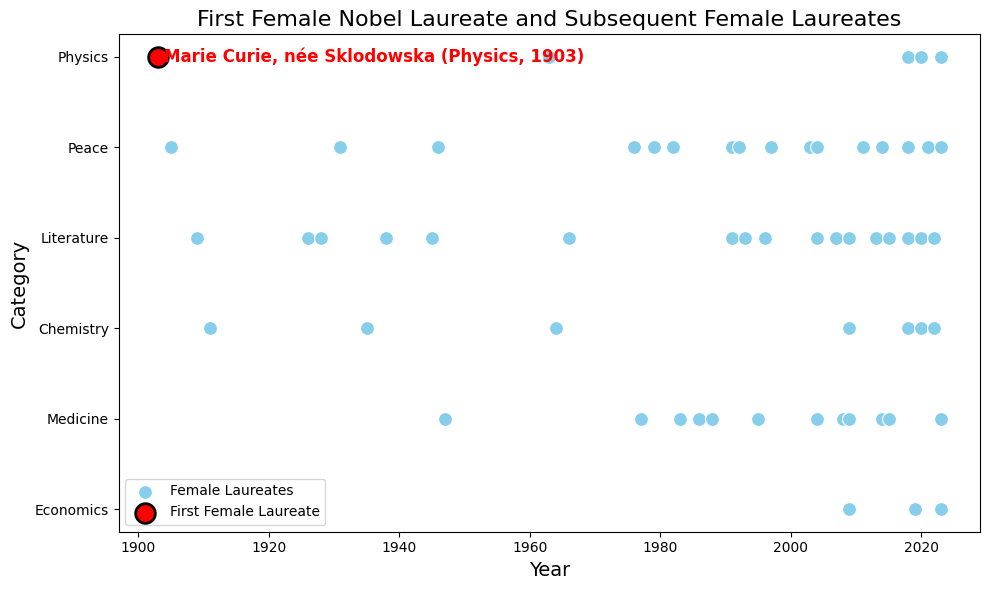

In [82]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot all female laureates
sns.scatterplot(x='year', y='category', data=female_laureates, color='skyblue', s=100, label='Female Laureates')

# Highlight the first female laureate
plt.scatter(first_female_laureate['year'], first_female_laureate['category'], color='red', s=200, label='First Female Laureate', edgecolor='black', linewidth=2)

# Annotate the first female laureate (including name, category, and year)
plt.text(first_female_laureate['year'] + 1, first_female_laureate['category'], 
         f'{first_female_laureate["full_name"]} ({first_female_laureate["category"]}, {first_female_laureate["year"]})', 
         color='red', ha='left', va='center', fontsize=12, fontweight='bold')

# Add titles and labels
plt.title('First Female Nobel Laureate and Subsequent Female Laureates', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Display legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

This tells us that the first woman to receive a Nobel Prize was `Marie Curie, née Sklodowska`.

# Which individuals or organizations have won more than one Nobel Prize throughout the years?

This time, we're going to find the repeat Nobel Prize winners, whether individuals or organizations.

First, we need to count occurrences by laureate name by grouping the `full_name` column and count the number of prizes each entity has won.

In [83]:
# Group by name (or organization_name) and count the number of awards per individual or organization
repeat_winners = nobel.groupby('full_name').size()

repeat_winners

full_name
A. Michael Spence    1
Aage Niels Bohr      1
Aaron Ciechanover    1
Aaron Klug           1
Abdus Salam          1
                    ..
Youyou Tu            1
Yuan T. Lee          1
Yves Chauvin         1
Zhores I. Alferov    1
Élie Ducommun        1
Length: 965, dtype: int64

After that, we can select only those laureates who have won more than once to find which individuals or organizations have won more than one Nobel Prize throughout the years.

In [84]:
# Filter for individuals or organizations that have won more than one Nobel Prize
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()

print(repeat_list)

['Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska']


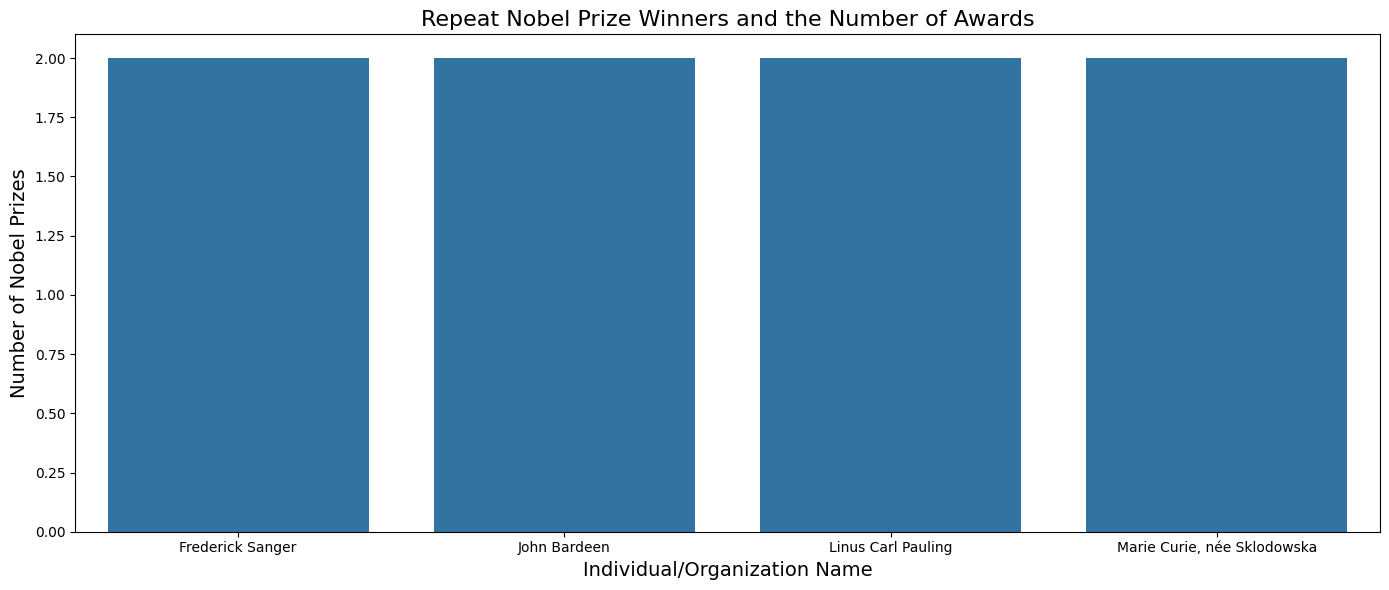

In [85]:
# Convert the Series to a DataFrame for plotting & rename the orgs with long name
repeat_winners_data = repeat_winners[repeat_winners > 1].reset_index()
repeat_winners_data['full_name'] = repeat_winners_data['full_name'].replace(
    'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'ICRC'
)
repeat_winners_data['full_name'] = repeat_winners_data['full_name'].replace(
    'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'UNHCR'
)
repeat_winners_data.columns = ['full_name', 'num_awards']  # Rename the columns

# Set plot size
plt.figure(figsize=(14, 6))

# Create the column (vertical) bar plot
sns.barplot(x='full_name', y='num_awards', data=repeat_winners_data)

# Add titles and labels
plt.title('Repeat Nobel Prize Winners and the Number of Awards', fontsize=16)
plt.xlabel('Individual/Organization Name', fontsize=14)
plt.ylabel('Number of Nobel Prizes', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

This shows us the list of all individuals or organizations that have won more than one Nobel Prize throughout the years.

# 